In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [57]:
train = pd.read_csv('/users/jjong/Desktop/vscode/kaggle_src/titanic/train.csv')
test = pd.read_csv('/users/jjong/Desktop/vscode/kaggle_src/titanic/test.csv')
submission = pd.read_csv('/users/jjong/Desktop/vscode/kaggle_src/titanic/gender_submission.csv')

In [58]:
test = test.dropna(axis=1)
test = test.drop(['Name', 'Ticket'], axis=1)
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [39]:
tmp = train.iloc[:,:-1].dropna(axis=1)
train = pd.concat([tmp, train.iloc[:,-1]], axis=1)
train = train.dropna()
train = train.drop(['Name', 'Ticket'], axis=1)
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [5]:
train['Sex'] = np.where(train['Sex'] == 'male', 0, 1)
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,1,0,A/5 21171,7.2500,S
1,2,1,1,1,1,0,PC 17599,71.2833,C
2,3,1,3,1,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,1,1,0,113803,53.1000,S
4,5,0,3,0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,211536,13.0000,S
887,888,1,1,1,0,0,112053,30.0000,S
888,889,0,3,1,1,2,W./C. 6607,23.4500,S
889,890,1,1,0,0,0,111369,30.0000,C


In [6]:
train['Embarked'] = np.where(train['Embarked'] == 'S', 0, np.where(train['Embarked'] == 'C', 1, 2))

<Figure size 640x480 with 0 Axes>

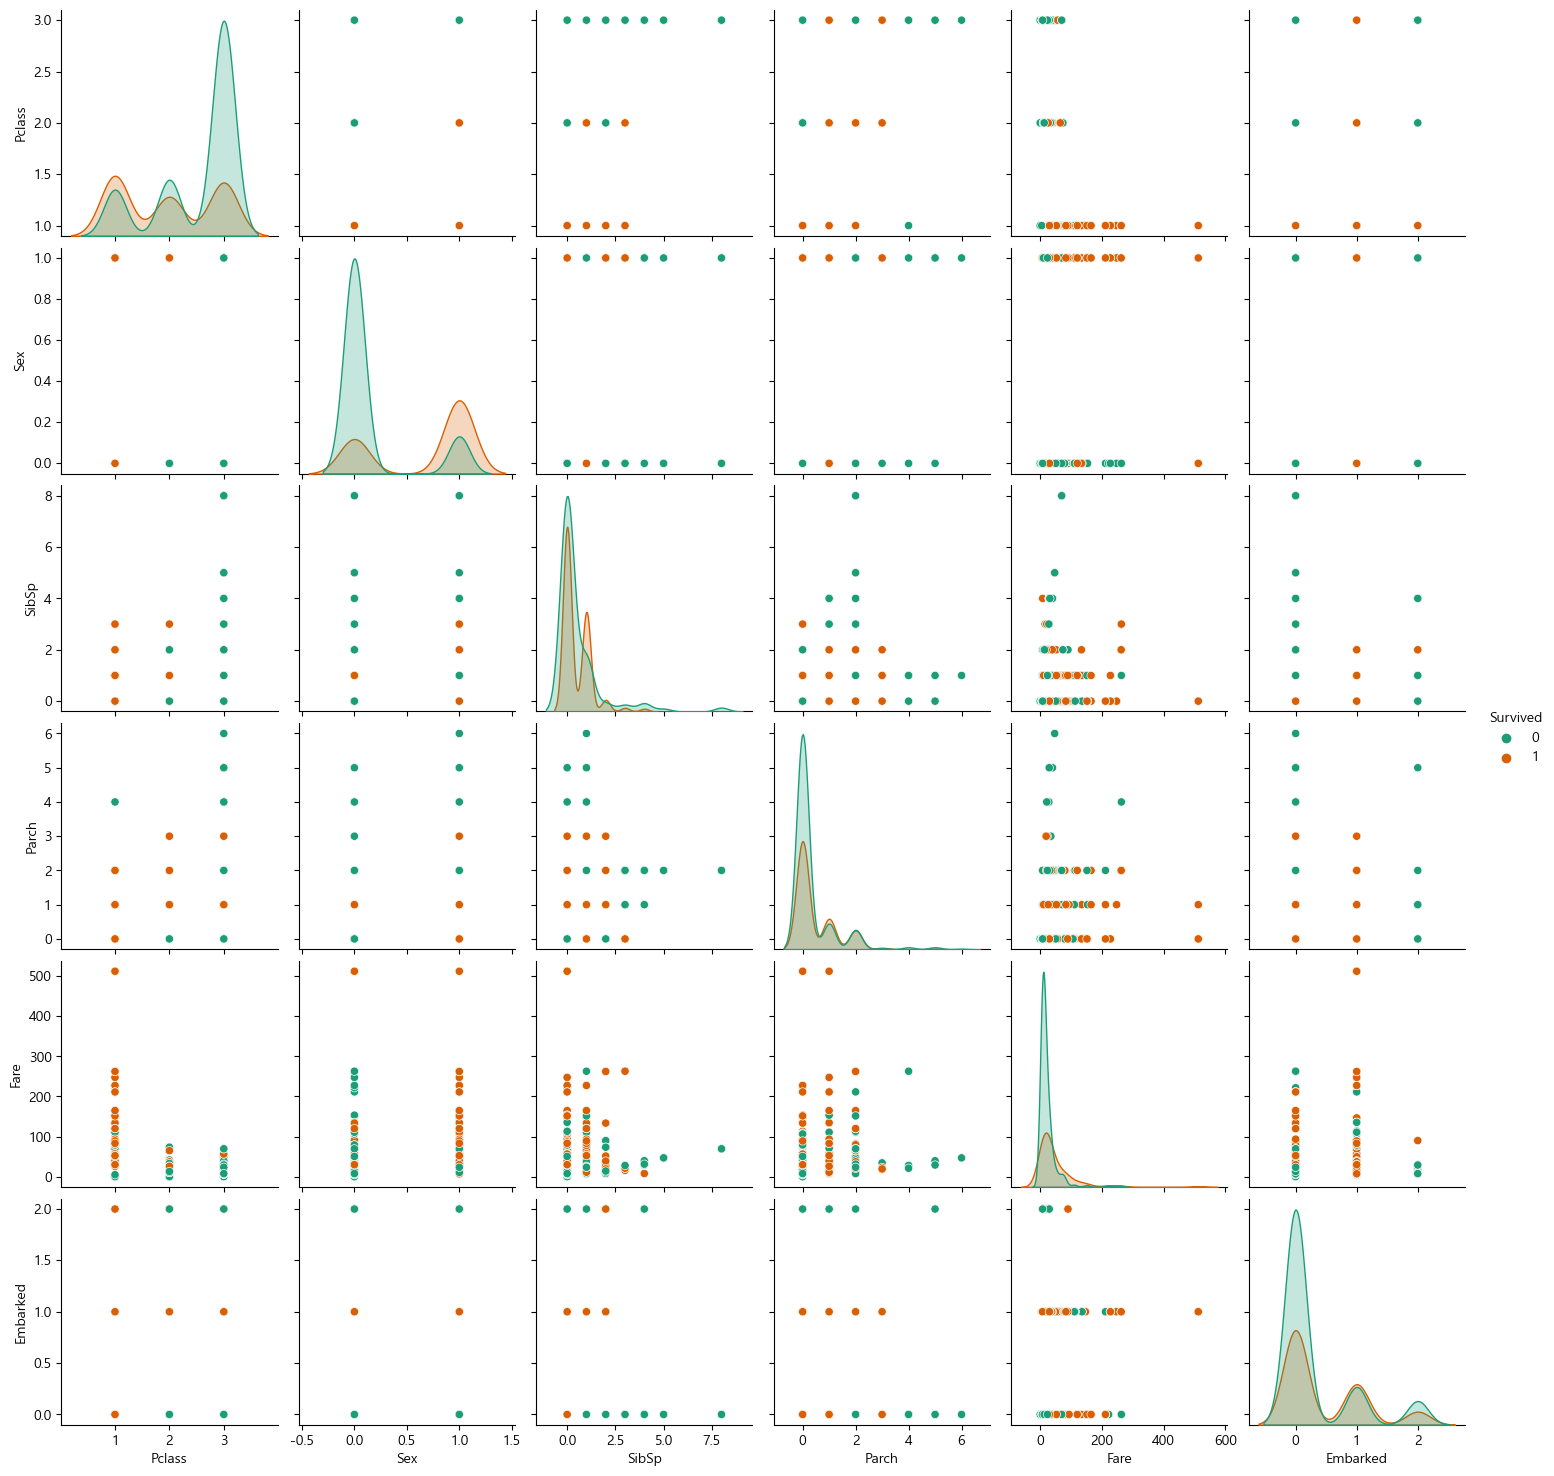

In [7]:
plt.figure()
sns.pairplot(train.iloc[:,1:], hue='Survived', palette='Dark2')
plt.show()

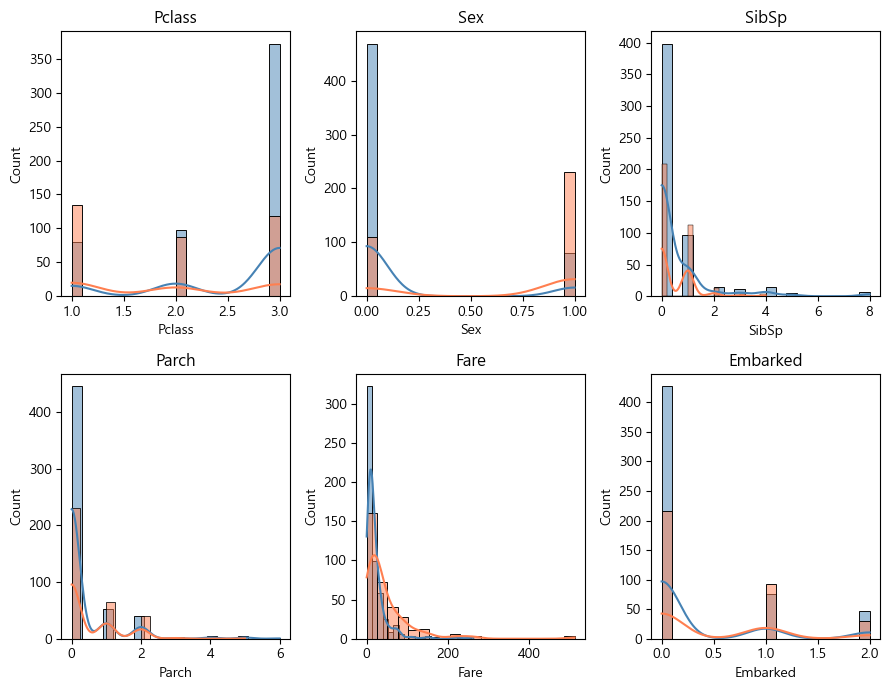

In [8]:
tmp = train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']].copy()
plt.figure(figsize=(9, 7))
for i, column in enumerate(tmp.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(tmp[tmp['Survived'] == 0][column], color='steelblue', alpha=0.5, bins=20, kde=True)
    sns.histplot(tmp[tmp['Survived'] == 1][column], color='coral', alpha=0.5, bins=20, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

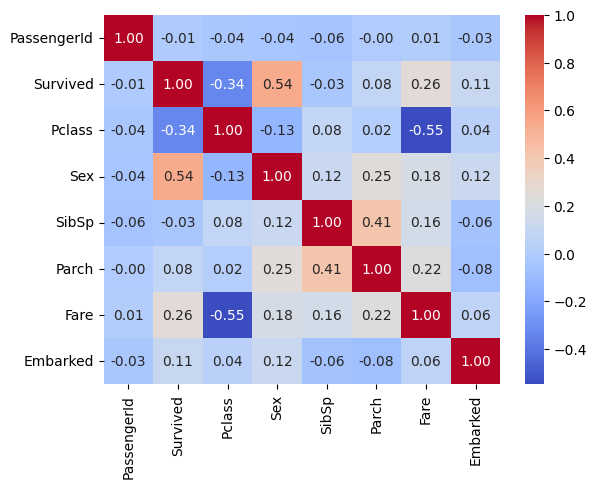

In [108]:
plt.figure()
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

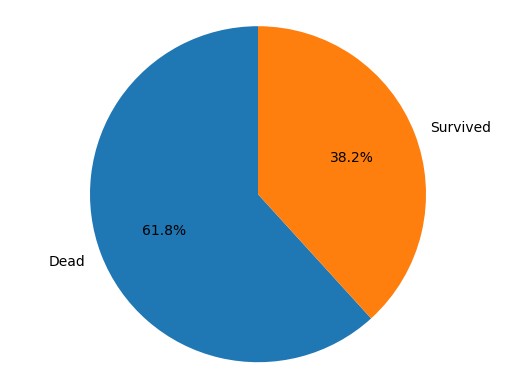

In [76]:
# 0과 1의 빈도수 계산
value_counts = train['Survived'].value_counts()

# 데이터 설정
labels = ['Dead', 'Survived']
sizes = [value_counts[0], value_counts[1]]

# 원그래프 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# 원으로 나타내기 위해 'aspect ratio'를 같게 설정
plt.axis('equal')

# 그래프 보이기
plt.show()

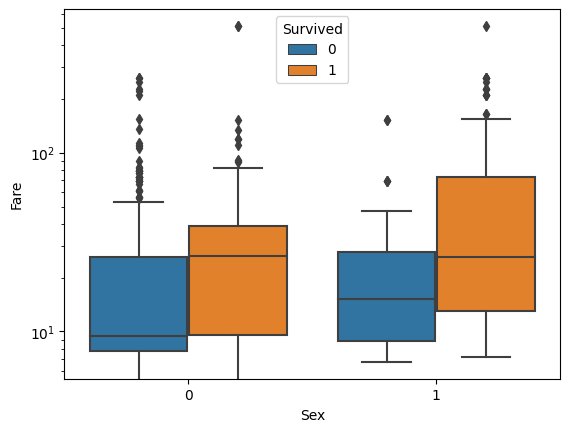

In [46]:
plt.figure()
sns.boxplot(data=train, x='Sex', y='Fare', hue='Survived')
plt.yscale('log')
plt.show()

In [52]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,1,0,A/5 21171,7.2500,S
1,2,1,1,1,1,0,PC 17599,71.2833,C
2,3,1,3,1,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,1,1,0,113803,53.1000,S
4,5,0,3,0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,211536,13.0000,S
887,888,1,1,1,0,0,112053,30.0000,S
888,889,0,3,1,1,2,W./C. 6607,23.4500,S
889,890,1,1,0,0,0,111369,30.0000,C


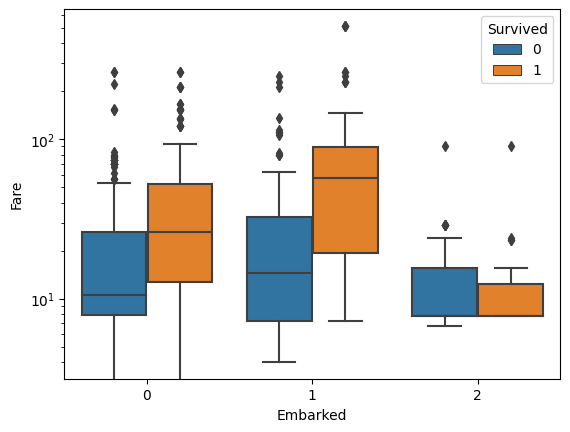

In [109]:
plt.figure()
sns.boxplot(data=train, x='Embarked', y='Fare', hue='Survived')
plt.yscale('log')
plt.show()

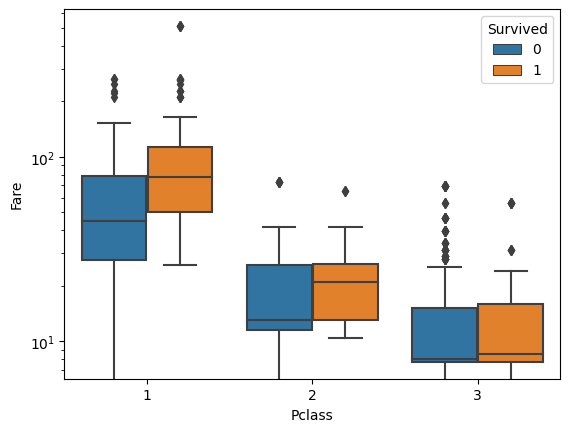

In [101]:
plt.figure()
sns.boxplot(data=train, x='Pclass', y='Fare', hue='Survived')
plt.yscale('log')
plt.show()

In [103]:
train['Ticket'].nunique()

680

In [7]:
X = train.drop(['Ticket', 'PassengerId', 'Survived', 'Fare'], axis=1).copy()
y = train['Survived'].copy()
X

,Pclass,Sex,SibSp,Parch,Embarked
0,3,0,1,0,0
1,1,1,1,0,1
2,3,1,0,0,0
3,1,1,1,0,0
4,3,0,0,0,0
...,...,...,...,...,...
886,2,0,0,0,0
887,1,1,0,0,0
888,3,1,1,2,0
889,1,0,0,0,1


In [8]:
X = pd.get_dummies(X, columns=['Pclass', 'Sex', 'Embarked'])
X

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,1,0,False,False,True,True,False,True,False,False
1,1,0,True,False,False,False,True,False,True,False
2,0,0,False,False,True,False,True,True,False,False
3,1,0,True,False,False,False,True,True,False,False
4,0,0,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
886,0,0,False,True,False,True,False,True,False,False
887,0,0,True,False,False,False,True,True,False,False
888,1,2,False,False,True,False,True,True,False,False
889,0,0,True,False,False,True,False,False,True,False


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

std = StandardScaler()
X_train_sc = std.fit_transform(X_train)
X_test_sc = std.transform(X_test)

In [10]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve, f1_score, roc_auc_score

def verification_train(y, predict):
    # 성능 평가
    print("Train Accuracy  : ", accuracy_score(y, predict))
    print('f1 score        : ', f1_score(y, predict))
    print('Recall Score    : ', recall_score(y, predict))
    print('precision score : ', precision_score(y, predict))
    print('confusion matrix : ------------------\n', confusion_matrix(y, predict))
    print("\n         --------- Test Classification Report --------")
    print(classification_report(y, predict))

    # 혼동 행렬 시각화
    plt.figure()
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, predict), display_labels=['Dead', 'Survived']).plot(cmap='Blues')
    plt.show()

def verification_test(y, predict):
    # 성능 평가
    print("Train Accuracy  : ", accuracy_score(y, predict))
    print('f1 score        : ', f1_score(y, predict))
    print('Recall Score    : ', recall_score(y, predict))
    print('precision score : ', precision_score(y, predict))
    print('confusion matrix : ------------------\n', confusion_matrix(y, predict))
    print("\n         --------- Test Classification Report --------")
    print(classification_report(y, predict))

    # 혼동 행렬 시각화
    plt.figure()
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, predict), display_labels=['Dead', 'Survived']).plot(cmap='Blues')
    plt.show()

# def roc_auc(y, predict):
    fpr, tpr, _ = roc_curve(y, predict)
    auc = roc_auc_score(y, predict)

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], linestyle='--')
    plt.text(0.5, 0.3, f'AUC = {auc:.4f}', fontsize=20)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

Train Accuracy  :  0.7247191011235955
f1 score        :  0.608
Recall Score    :  0.5205479452054794
precision score :  0.7307692307692307
confusion matrix : ------------------
 [[91 14]
 [35 38]]

         --------- Test Classification Report --------
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       105
           1       0.73      0.52      0.61        73

    accuracy                           0.72       178
   macro avg       0.73      0.69      0.70       178
weighted avg       0.73      0.72      0.71       178



<Figure size 640x480 with 0 Axes>

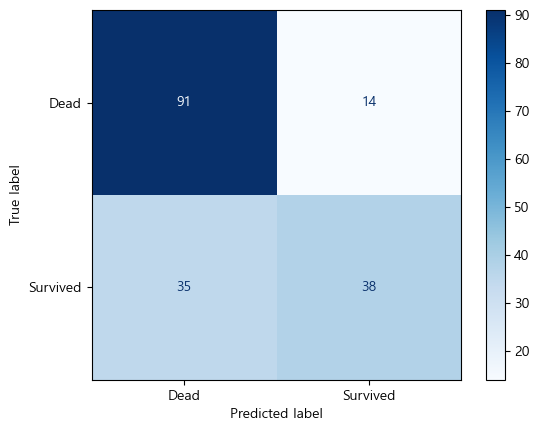

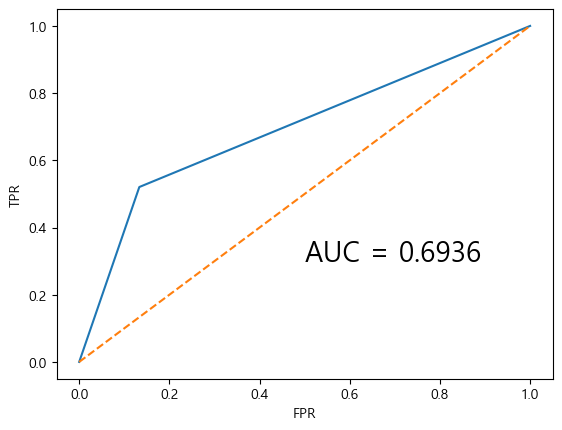

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

verification_test(y_test, y_pred)

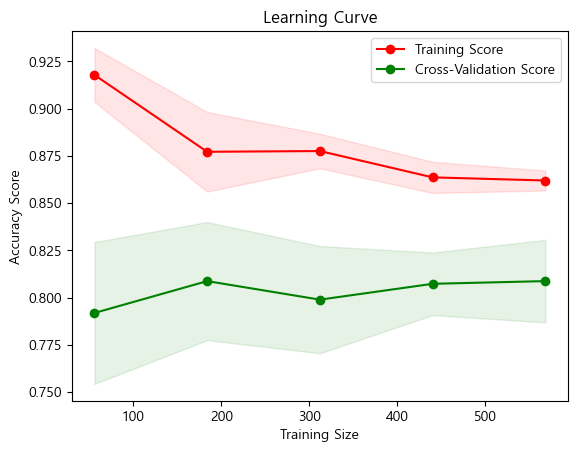

In [161]:
from sklearn.model_selection import learning_curve

# 학습 곡선 계산
train_sizes, train_scores, valid_scores = learning_curve(dt, X_train, y_train, cv=5, scoring='accuracy')

# 평균과 표준 편차 계산
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# 그래프 그리기
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, valid_scores_mean, 'o-', color='g', label='Cross-Validation Score')

plt.legend(loc='best')
plt.show()

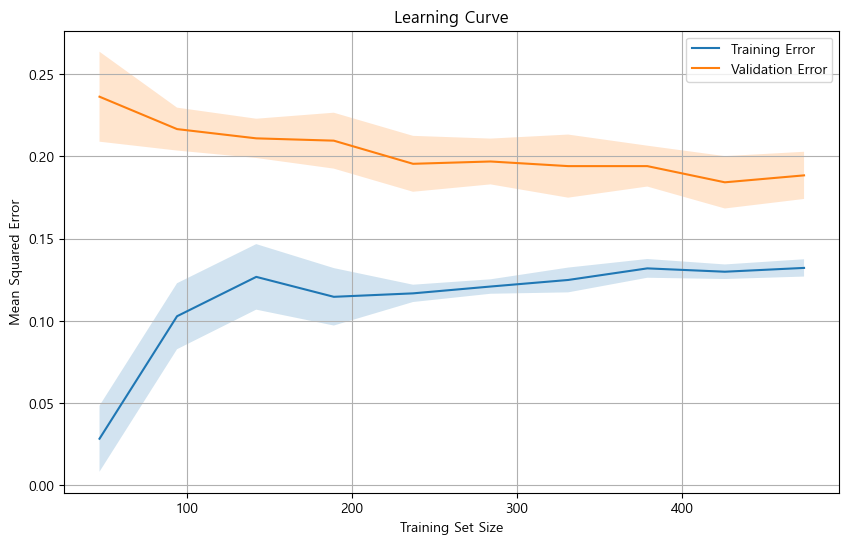

In [159]:
from sklearn.model_selection import learning_curve

# 학습곡선
sizes, train_scores, val_scores = learning_curve(estimator=dt, X=X_train, y=y_train,
                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = -np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(sizes, train_mean, label='Training Error')
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(sizes, val_mean, label='Validation Error')
plt.fill_between(sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

# plt.yscale('log')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import time

start = time.time()

# Random Forest 모델 생성
rf = RandomForestRegressor()

# 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 6, 7,8,9,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# GridSearchCV를 이용한 모델 훈련
grid_search.fit(X_train_sc, y_train)

# 최적의 파라미터와 그 때의 점수 출력
print("최적의 파라미터:", grid_search.best_params_)
print("최고 점수:", grid_search.best_score_)

edn = time.time()
print(f"time : {edn - start}")

최적의 파라미터: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
최고 점수: 0.4291272491775636
time : 21.949859619140625


In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=5, min_samples_leaf=2, min_samples_split=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Train Accuracy  :  0.7247191011235955
f1 score        :  0.6201550387596898
Recall Score    :  0.547945205479452
precision score :  0.7142857142857143
confusion matrix : ------------------
 [[89 16]
 [33 40]]

         --------- Test Classification Report --------
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       105
           1       0.71      0.55      0.62        73

    accuracy                           0.72       178
   macro avg       0.72      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178



<Figure size 640x480 with 0 Axes>

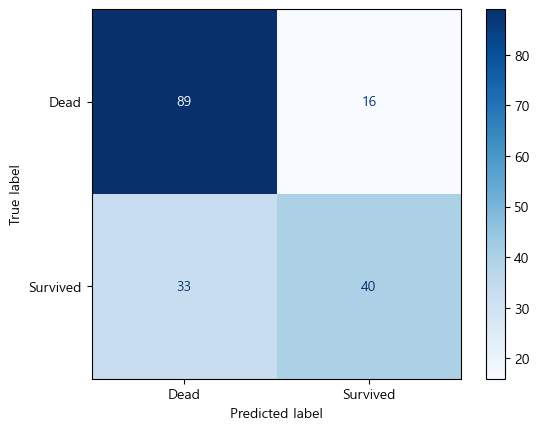

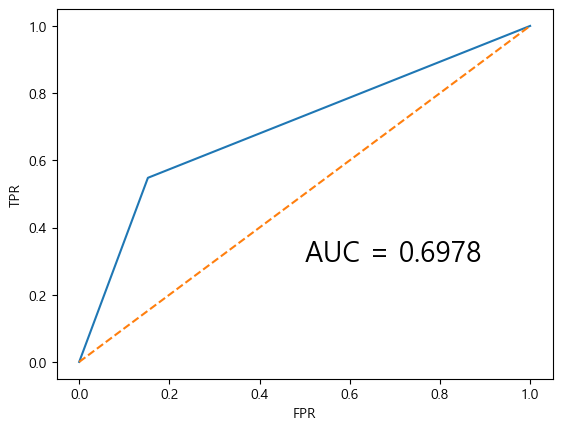

In [13]:
verification_test(y_test, y_pred_rf)

In [78]:
# 필요한 라이브러리 임포트
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import time

start = time.time()

# XGBoost 회귀 모델 생성
xgb_clf = XGBClassifier()

# 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [5, 6, 7, 8, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, n_jobs=-1)

# GridSearchCV를 이용한 모델 훈련
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그 때의 점수 출력
print("최적의 파라미터:", grid_search.best_params_)
print("최고 점수:", grid_search.best_score_)

end = time.time()
print("time :", end - start)

최적의 파라미터: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
최고 점수: 0.8199718706047819
time : 225.87850952148438


In [102]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300, learning_rate=0.1, gamma=0, subsample=1, colsample_bytree=0.2, max_depth=5)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

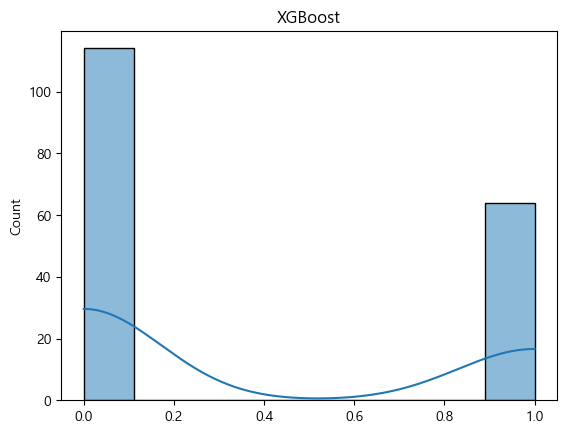

Train Accuracy  :  0.7471910112359551
f1 score        :  0.6715328467153284
Recall Score    :  0.6301369863013698
precision score :  0.71875
confusion matrix : ------------------
 [[87 18]
 [27 46]]

         --------- Test Classification Report --------
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       105
           1       0.72      0.63      0.67        73

    accuracy                           0.75       178
   macro avg       0.74      0.73      0.73       178
weighted avg       0.74      0.75      0.74       178



<Figure size 640x480 with 0 Axes>

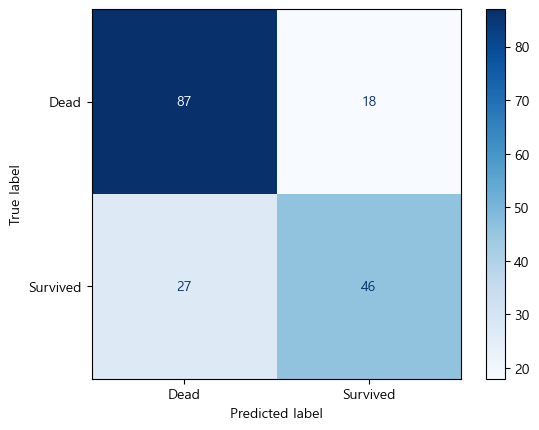

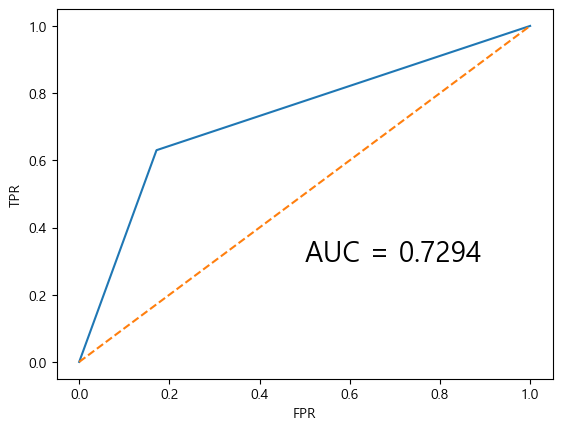

In [100]:
y_binary = y_pred_xgb > 0.35
plt.figure()
sns.histplot(y_pred_xgb, kde=True)
plt.title('XGBoost')
plt.show()
verification_test(y_test, y_binary)

In [101]:
test

,PassengerId,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,892,0,0,False,False,True,True,False,False,False,True
1,893,1,0,False,False,True,False,True,True,False,False
2,894,0,0,False,True,False,True,False,False,False,True
3,895,0,0,False,False,True,True,False,True,False,False
4,896,1,1,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,0,False,False,True,True,False,True,False,False
414,1306,0,0,True,False,False,False,True,False,True,False
415,1307,0,0,False,False,True,True,False,True,False,False
416,1308,0,0,False,False,True,True,False,True,False,False


In [59]:
test['Sex'] = np.where(test['Sex'] == 'male', '0', '1')
test['Embarked'] = np.where(test['Embarked'] == 'S', '0', np.where(test['Embarked'] == 'C', '1', '2'))
test['Pclass'] = np.where(test['Pclass'] == 1, '1', np.where(test['Pclass'] == 2, '2', '3'))

In [60]:
test = pd.get_dummies(test)
# test = test.drop('PassengerId', axis=1)
test

,PassengerId,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,892,0,0,False,False,True,True,False,False,False,True
1,893,1,0,False,False,True,False,True,True,False,False
2,894,0,0,False,True,False,True,False,False,False,True
3,895,0,0,False,False,True,True,False,True,False,False
4,896,1,1,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,0,False,False,True,True,False,True,False,False
414,1306,0,0,True,False,False,False,True,False,True,False
415,1307,0,0,False,False,True,True,False,True,False,False
416,1308,0,0,False,False,True,True,False,True,False,False


In [24]:
X_train

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
364,1,0,False,False,True,True,False,False,False,True
256,0,0,True,False,False,False,True,False,True,False
477,1,0,False,False,True,True,False,True,False,False
272,0,1,False,True,False,False,True,True,False,False
554,0,0,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
837,0,0,False,False,True,True,False,True,False,False
193,1,1,False,True,False,True,False,True,False,False
630,0,0,True,False,False,True,False,True,False,False
560,0,0,False,False,True,True,False,False,False,True


In [61]:
real_test = test.drop(['PassengerId'], axis=1).copy()
id_test = test['PassengerId'].copy()

In [72]:
std.transform(real_test)
y_real_predict = dt.predict(real_test)
# sns.histplot(y_real_predict, kde=True)

In [103]:
y_real_predict = xgb.predict(real_test)

In [107]:
y_real_predict = pd.DataFrame(y_real_predict)
submit = pd.concat([id_test, y_real_predict], axis=1)
submit.rename(columns={0: 'Survived'}, inplace=True)

In [108]:
submit.to_csv('titanic_submission.csv', index=False)

In [106]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
